# CS4320 Introduction to Machine Learning

**Please type your group name here:**


In [ ]:
GroupName = "NoProblem"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents

1. [Understanding the problem](#1)
2. [Imports](#2)
   1. [Importing Packages](#2a)
   2. [Data splitting](#2b)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5)
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11)
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)


<!-- BEGIN QUESTION -->

## 1 Prediction Problem and Explaination <a name="1"></a>

<hr>

**Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset.**


The problem is to forecast store sales for _Corporación Favorita_, a large Ecuadorian-based grocery retailer. The goal is to use previous sales data. The previously sales data is _family_ category which has a _store_nbr_, total number of items in that category that were _onpromotion_ that day, the specific date, and the total items sold that day for that family. The dates are able to be cross referenced with holidays in order to get a better time prediction. The family I am assuming will be very time dependent as needed change over the course of the year and many sales in my experience are holiday dependent. 


<!-- END QUESTION -->

<br><br>


## 2 Imports <a name="2"></a>

<hr>


### 2a Importing Packages <a name="2a"></a>

<hr>

**Import all necessary packages**


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns

<!-- BEGIN QUESTION -->

### 2b Data splitting <a name="2b"></a>

<hr>

**Split the data into train and test portions.**


In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>

<hr>



### Perform exploratory data analysis on the train set, including summary statistics


In [73]:
display(train_df.head())
display(train_df.info())

display("Numerical Data Description")
display(train_df.describe(include=['int64', 'float64']))

display("Categorical Data Description")
display(train_df.describe(include=['object']))

display("Family (Categor) Counts")
display(train_df['family'].value_counts())

,id,date,store_nbr,family,sales,onpromotion,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013
4,4,2013-01-01,1,BOOKS,0.0,0,2013


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 160.3+ MB


None

'Numerical Data Description'

,id,store_nbr,sales,onpromotion,year
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00,2.014838e+03
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01,1.345518e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00,2.014000e+03
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00,2.015000e+03
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00,2.016000e+03
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,2.017000e+03


'Categorical Data Description'

,family
count,3000888
unique,33
top,AUTOMOTIVE
freq,90936


'Family (Categor) Counts'

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

Here, we can see that there are 2 categorical varaibles: dates and family. There are 1684 unique dates and 33 unique family categories Additionally, there are an equal number of family counts, making this variable already statefied. 

### Useful Visual Statistics


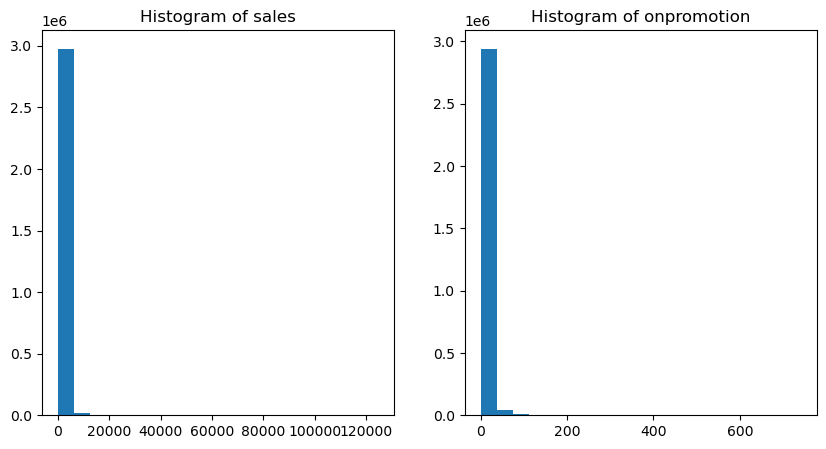

In [74]:
import seaborn as sns

#  Show all sales and onpromotion
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(train_df['sales'], bins=20)
axs[1].hist(train_df['onpromotion'], bins=20)

axs[0].set_title('Histogram of sales')
axs[1].set_title('Histogram of onpromotion')

plt.show()


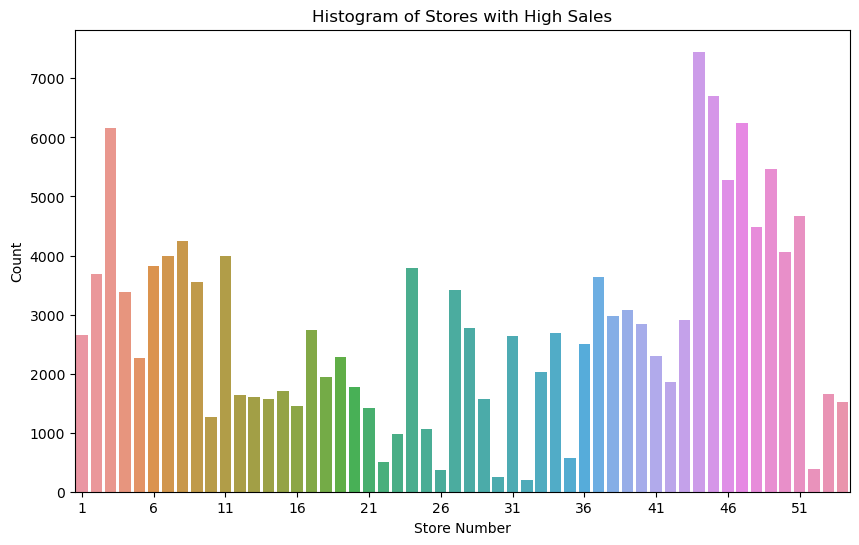

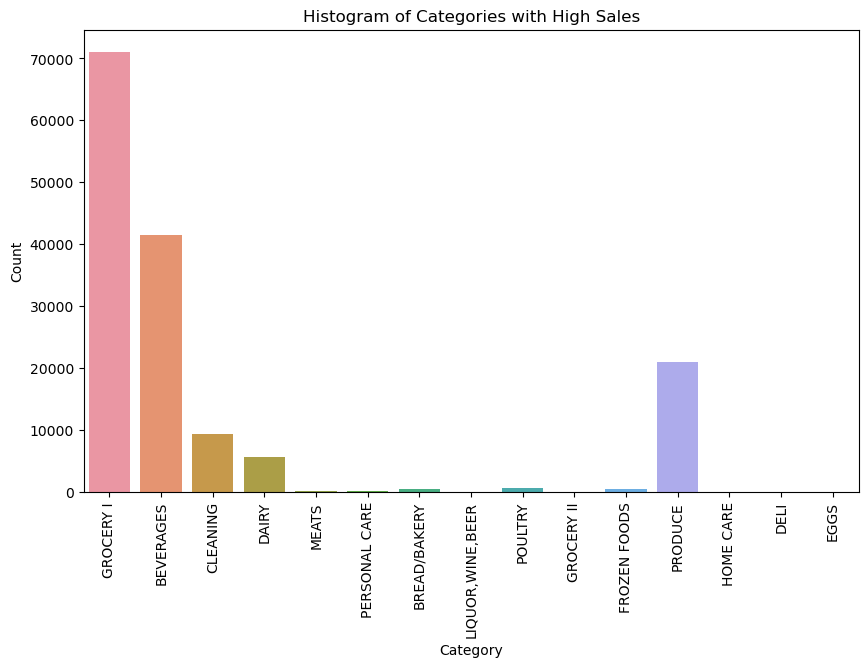

In [77]:
# Identify higher sales to see if there is a pattern
lower_bound = train_df['sales'].quantile(0.05)
upper_bound = train_df['sales'].quantile(0.95)  
upper_outliers = train_df[train_df['sales'] > upper_bound]

# Plot the histogram of sales for the upper outliers
plt.figure(figsize=(10, 6))
sns.countplot(x='store_nbr', data=upper_outliers)
plt.title('Histogram of Stores with High Sales')
plt.xlabel('Store Number')
plt.ylabel('Count')
locs, labels = plt.xticks()
plt.xticks(locs[0::5], labels[0::5])
plt.show()

# Plot the histogram of sales for the upper outliers
plt.figure(figsize=(10, 6))
sns.countplot(x="family", data=upper_outliers)
plt.title('Histogram of Categories with High Sales')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()
strat_df = train_df.copy(deep=True)



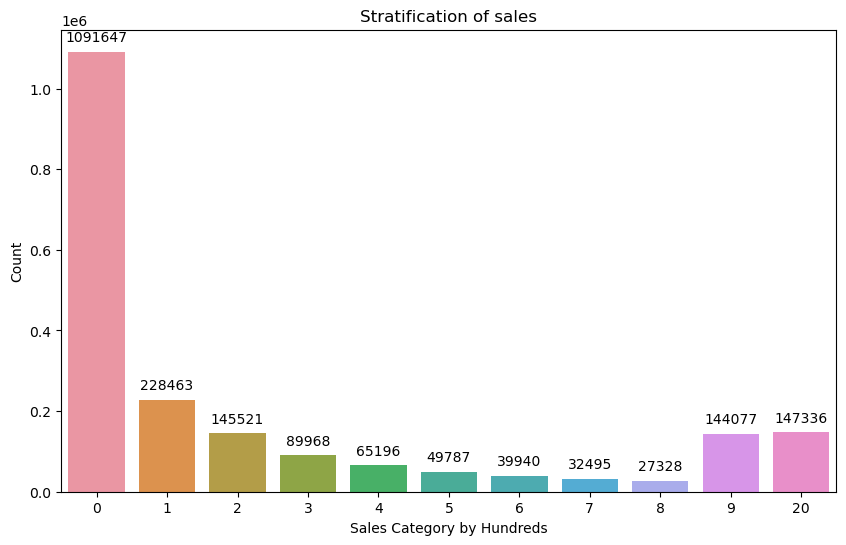

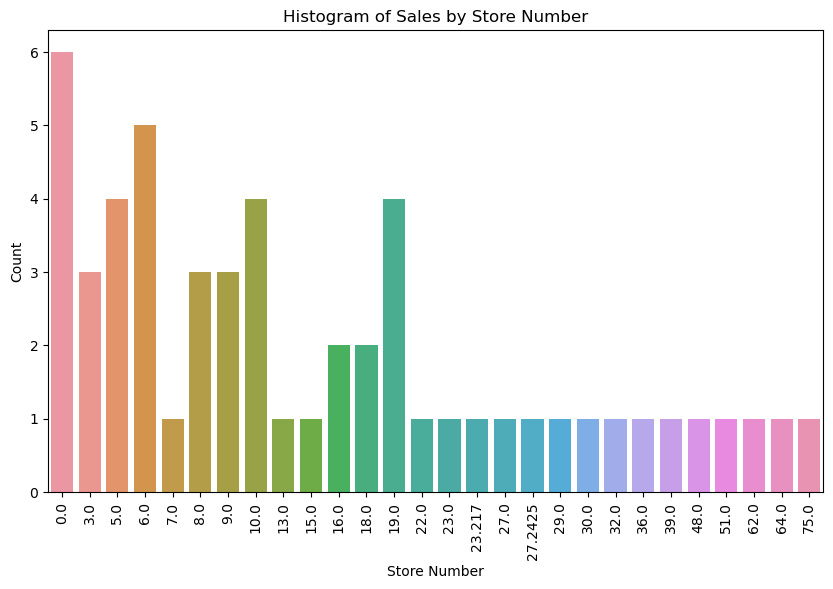

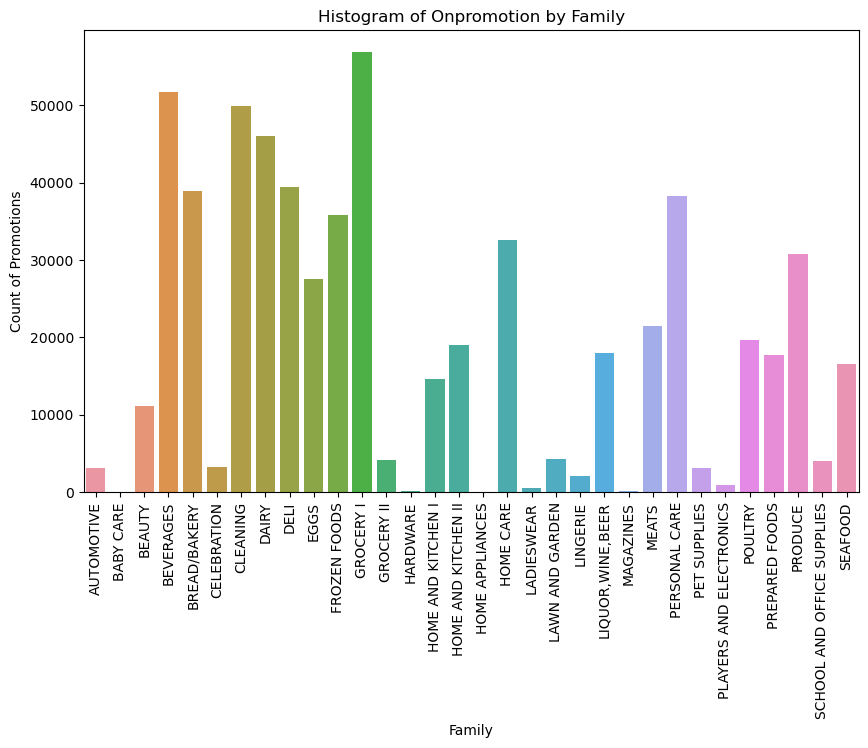

In [104]:
# Create a new column 'sales_category' to stratify the sales into 10 categories
strat_df = train_df.copy(deep=True)
strat_df['sales_category'] = pd.cut(strat_df['sales'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 2000, np.inf], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20])

strat_df = strat_df.dropna(subset=['sales_category'])
strat_df['sales_category'] = strat_df['sales_category'].astype(int)

# Plot the stratification of sales to see if there is a significant outliers 
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sales_category', data=strat_df)
plt.title('Stratification of sales')
plt.xlabel('Sales Category by Hundreds')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

# Plot a histogram of sales by family
store_sales = train_df.groupby('store_nbr')['sales'].median()
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=store_sales.index, data=store_sales)
plt.title('Histogram of Sales by Store Number')
plt.xlabel('Store Number')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot a histogram of family onpromotion values
promotion_family = train_df[train_df['onpromotion'] != 0].groupby('family')['onpromotion'].count().reset_index()

# Plot a bar plot of promotions by family
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="family", y="onpromotion", data=promotion_family)
plt.title('Histogram of Onpromotion by Family')
plt.xlabel('Family')
plt.ylabel('Count of Promotions')
plt.xticks(rotation=90)
plt.show()

* While we did see before that there are an equal number of families in the test set, some have far higher profitable items such as GROCERY I and BEVERAGES. This could be a good indicator of what items will appear promotable later on in the modeling and a way of loosely seeing our model accuracy before we even begin. 
* The graphs also shows that Feature Clipping is not a good idea for this dataset as it would remove a large amount of relevent data. 
* The store_nbr can now be put into clusters in order to create a more concise evaluation since more than half of the stores have median sales of 1.
* The number of promotions differs from family to family, which might be an indicator of why certain families have higher sales. 

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>

<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.


In [ ]:
# Your code here

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>

<hr>

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type.
2. Define a column transformer, if necessary.


In [ ]:
# Your code here

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>

<hr>

**Your tasks:**

1. Try `scikit-learn`'s baseline model and report results.


In [ ]:
# Your code here

<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>

<hr>

**Your tasks:**

1. Try a linear model as a first real attempt.
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter.
3. Report cross-validation scores along with standard deviation.
4. Summarize your results.


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>

<hr>

**Your tasks:**

1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model.
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model?


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>

<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it.


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>

<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.

- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>

<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models.
2. Summarize your observations.


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>

<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>

<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.


In [ ]:
# Your code here

_Type your answer here, replacing this text._


<!-- END QUESTION -->

<br><br>


<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>

<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers. Discuss other ideas that you did not try but could potentially improve the performance/interpretability .


<!-- END QUESTION -->

<br><br>
